<a href="https://colab.research.google.com/github/Jay5852/100-days-machine-learning-daily-practice/blob/main/outlier_detection/z_score_outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/placement.csv')

In [25]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [27]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


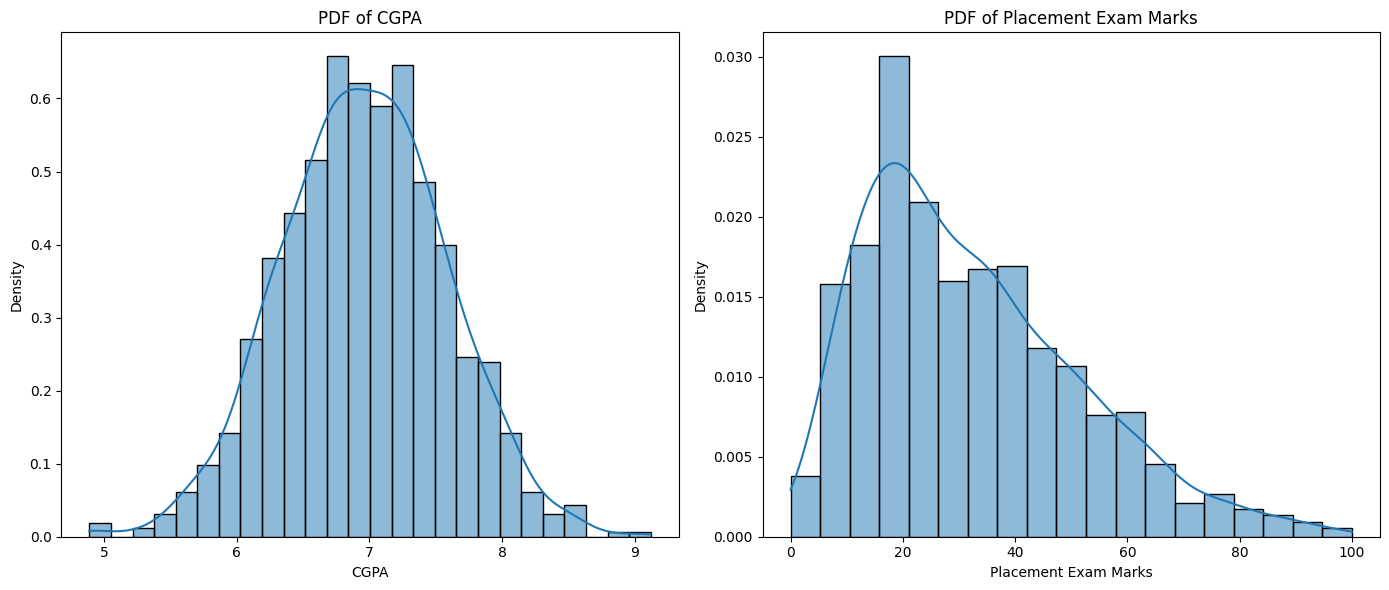

In [28]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['cgpa'], kde=True, stat='density')
plt.title('PDF of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.histplot(df['placement_exam_marks'], kde=True, stat='density')
plt.title('PDF of Placement Exam Marks')
plt.xlabel('Placement Exam Marks')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [31]:
print("Mean of the cgpa ",df['cgpa'].mean())
print("Std of the cgpa ",df['cgpa'].std())
print("Min  of the cgpa ",df['cgpa'].min())
print("Max of the cgpa ",df['cgpa'].max())

Mean of the cgpa  6.96124
Std of the cgpa  0.6158978751323894
Min  of the cgpa  4.89
Max of the cgpa  9.12


In [35]:
#Finding the boundary values
Highest = df['cgpa'].mean() + 3*df['cgpa'].std()
Lowest = df['cgpa'].mean() - 3*df['cgpa'].std()

In [36]:
Highest,Lowest

(np.float64(8.808933625397168), np.float64(5.113546374602832))

In [39]:
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11 )]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

In [44]:
new_df =  df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]

In [45]:

new_df.shape

(995, 3)

In [46]:
# Approach 2
df['Z_score_cgpa'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [48]:
df.head()

,cgpa,placement_exam_marks,placed,Z_score_cgpa
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [51]:
df[(df['Z_score_cgpa'] > 3)]

,cgpa,placement_exam_marks,placed,Z_score_cgpa
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [53]:
df[(df['Z_score_cgpa'] < -3)]

,cgpa,placement_exam_marks,placed,Z_score_cgpa
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [54]:
df[(df['Z_score_cgpa'] > 3) | (df['Z_score_cgpa'] < -3)]

,cgpa,placement_exam_marks,placed,Z_score_cgpa
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [57]:
new_df2 = df[(df['Z_score_cgpa'] < 3) & (df['Z_score_cgpa'] > -3)]

In [58]:
new_df2.shape

(995, 4)

# Capping

In [61]:
upper_limit= df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit= df['cgpa'].mean() - 3*df['cgpa'].std()

In [62]:

upper_limit

np.float64(8.808933625397168)

In [63]:
df['cgpa'] = np.where(
            df['cgpa'] > upper_limit,
            upper_limit,
            np.where(
                df['cgpa'] < lower_limit,
                lower_limit,
                df['cgpa']
            )
          )


In [64]:
df.shape

(1000, 4)

In [65]:
df.describe()

,cgpa,placement_exam_marks,placed,Z_score_cgpa
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.225000,0.489000,-1.474376e-16
std,0.612688,19.130822,0.500129,1.000000e+00
min,5.113546,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,8.808934,100.000000,1.000000,3.505062e+00


In [66]:
print("Min  of the cgpa ",df['cgpa'].min())
print("Max of the cgpa ",df['cgpa'].max())

Min  of the cgpa  5.113546374602832
Max of the cgpa  8.808933625397168
